In [1]:
# p.53 3.2 scikit-learnの活用
from sklearn import datasets
import numpy as np
# Irisデータセットをロード
iris = datasets.load_iris()
# 3, 4列目の特徴量を抽出
X = iris.data[:, [2, 3]]
# クラスラベルを取得
y = iris.target
# 一意なクラスラベルを出力
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
# エポック数40, 学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=2)
# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=2, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [7]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [8]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    # テストサンプルを目立たせる(点を○表示)
    if test_idx:
        # すべてのサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set')

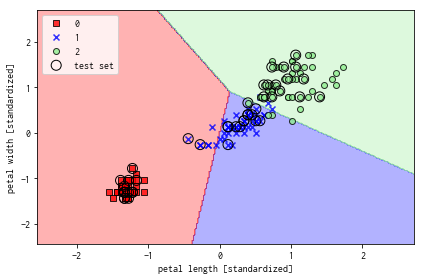

In [10]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定(左上に配置)
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout()
plt.show()

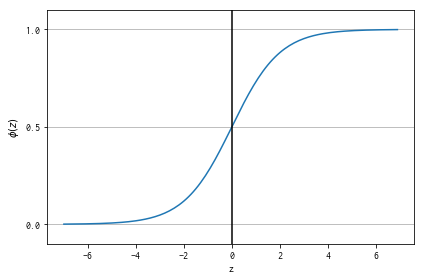

In [11]:
# p.60 3.3.1 シグモイド関数
import matplotlib.pyplot as plt
import numpy as np
# シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)

# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)

# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)

# 垂直線を追加(z=0)
plt.axvline(0.0, color='k')

# y軸の上限 / 下限を設定
plt.ylim(-0.1, 1.1)

# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛りを追加
plt.yticks([0.0, 0.5, 1.0])

# Axesクラスのオブジェクトの取得
ax = plt.gca()

# y軸の目盛りに合わせて水平グリッド線を追加
ax.yaxis.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()

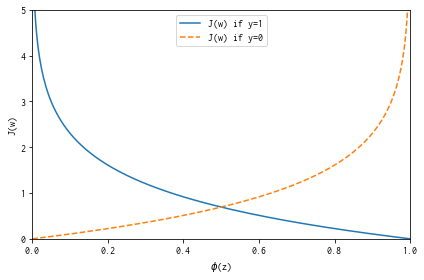

In [12]:
# y=1のコストを計算する関数
def cost_1(z):
    return - np.log(sigmoid(z))

# y=0のコストを計算する関数
def cost_0(z):
    return - np.log(1 - sigmoid(z))

# 0.1間隔で-10以上10未満のデータを生成
z = np.arange(-10, 10, 0.1)

# シグモイド関数を実行
phi_z = sigmoid(z)

# y=1のコストを計算する関数を実行
c1 = [cost_1(x) for x in z]

# 結果をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')

# y=0のコストを計算する関数を実行
c0 = [cost_0(x) for x in z]

# 結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# x軸とy軸の上限 / 下限を設定
plt.ylim(0.0, 5,1)
plt.xlim([0, 1])

# 軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

# 凡例を設定
plt.legend(loc='upper center')

# グラフを表示
plt.tight_layout()
plt.show()

In [13]:
class LogisticRegressionGD(object):
    """ 勾配降下法に基づくロジスティック回帰分類機
    
    パラメータ
    --------------
    eta : float
        学習率(0.0より大きく1.0以下の値)
    n_iter : int
        トレーニングデータのトレーニング回数
    random_state : int
        重みを初期化するための乱数シード
        
    属性
    --------------
    w_ : 1次元配列
        適合後の重み
    cost_ : リスト
        各エポックでの誤差平方和コスト関数
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 乱数シードを固定にする random_state
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        --------------
        X : {配列のような構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        --------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        # トレーニング回数分トレーニングデータを反復処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            
            # エポックごとのコストを格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ ロジスティックシグモイド活性化関数を計算 """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 以下に等しい:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

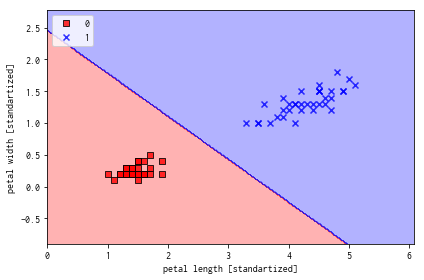

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# ロジスティック回帰のインスタンスを生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

# モデルをトレーニングデータに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)

# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)

# 軸のラベルを設定
plt.xlabel('petal length [standartized]')
plt.ylabel('petal width [standartized]')

# 凡例を設定(左上に配置)
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout()
plt.show()

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


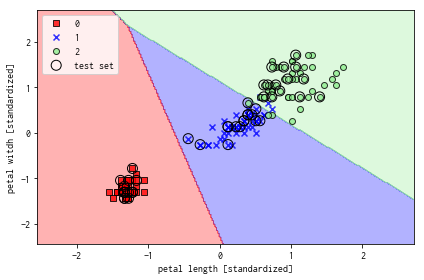

In [15]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1)

# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105, 150))

# 軸のラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal witdh [standardized]')

# 凡例を設定(左上に配置)
plt.legend(loc='upper left')

# グラフを表示
plt.tight_layout()
plt.show()

In [16]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [17]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [18]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nagahamanil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/U

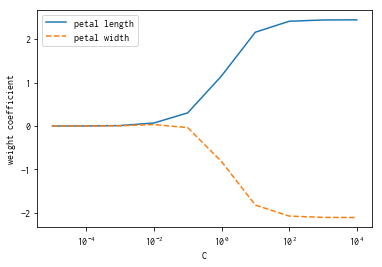

In [20]:
# p.75

# 空のリストを生成 (重み係数、逆正則化パラメータ)
weights, params = [], []

# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    
    # 重み係数を格納
    weights.append(lr.coef_[1])
    
    # 逆正則化パラメータを格納
    params.append(10.**c)
    
# 重み係数をNumPy配列に変換
weights = np.array(weights)

# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')

# 横軸を対数スケールに設定
plt.xscale('log')
plt.show()

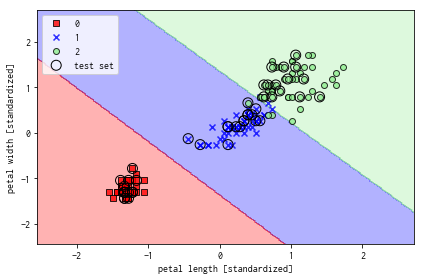

In [21]:
from sklearn.svm import SVC

# 線形SVMのインスタンスを生成
svm = SVC(kernel='linear', C=1.0, random_state=1)

# 線形SVMのモデルにトレーニングデータを適合させる
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.linear_model import SGDClassifier

# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')

# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')

# 確率的勾配降下法バージョンのSVM(損失関数=ヒンジ関数)を生成
svm = SGDClassifier(loss='hinge')